# Import the library

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [70]:
train=pd.read_csv('datasets/train.csv')
test=pd.read_csv('datasets/test.csv')

# EDA

In [140]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [142]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [143]:
dataset=pd.concat((train, test), axis=0)

In [144]:
dataset.set_index('PassengerId',inplace=True)

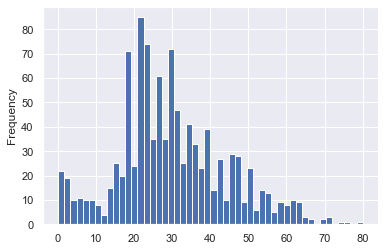

In [145]:
dataset['Age'].plot.hist(bins=50);

In [146]:
dataset['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [147]:
age_mean=dataset['Age'].mean()
age_std=dataset['Age'].std()
size=dataset['Age'].isna().sum()
random_list=np.random.randint(low=age_mean-age_std, high=age_mean+age_std, size=size)
dataset['Age'][dataset['Age'].isna()]=random_list

C:\Users\sKuma\anaconda3\envs\tf_4\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


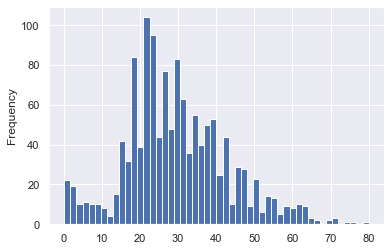

In [148]:
dataset['Age'].plot.hist(bins=50);

In [149]:
dataset['Age'].describe()

count    1309.000000
mean       29.678892
std        13.429203
min         0.170000
25%        21.000000
50%        28.000000
75%        38.000000
max        80.000000
Name: Age, dtype: float64

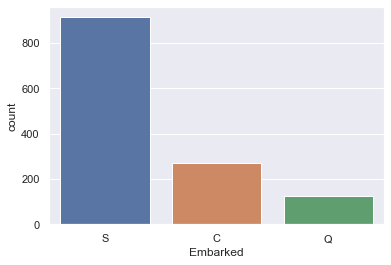

In [150]:
sns.countplot('Embarked', data=dataset);

In [151]:
dataset['Embarked'].fillna('S', inplace=True)

In [152]:
dataset.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       0
dtype: int64

In [153]:
dataset['Family_size']=dataset['SibSp']+dataset['Parch']+1

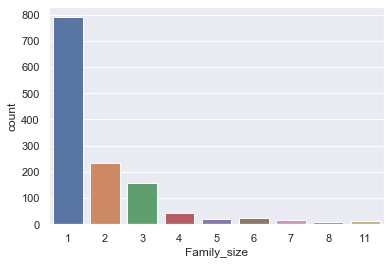

In [154]:
sns.countplot('Family_size', data=dataset)

In [155]:
dataset['Fare'][dataset['Fare'].isna()]

PassengerId
1044   NaN
Name: Fare, dtype: float64

In [156]:
dataset.loc[1044]

Survived                      NaN
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Family_size                     1
Name: 1044, dtype: object

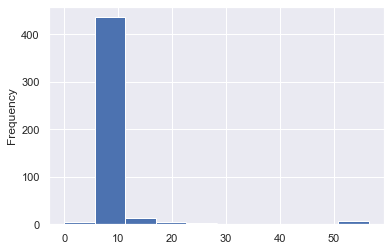

In [157]:
dataset.loc[((dataset['Pclass']==3) & (dataset['Family_size']==1)),'Fare'].plot.hist()

In [158]:
dataset.loc[((dataset['Pclass']==3) & (dataset['Family_size']==1)),'Fare'].median()

7.8542

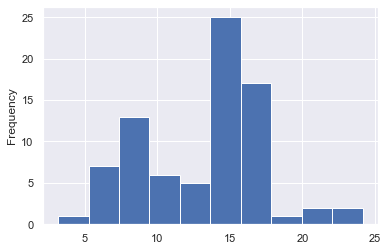

In [159]:
dataset.loc[((dataset['Pclass']==3) & (dataset['Family_size']==2)),'Fare'].plot.hist();

In [160]:
dataset['Fare'].fillna(7.8542, inplace=True)

In [161]:
dataset.drop('Cabin', axis=1, inplace=True)

In [162]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


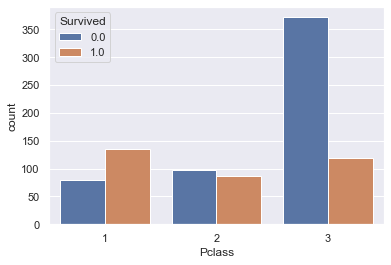

In [163]:
sns.countplot('Pclass', hue='Survived', data=dataset)

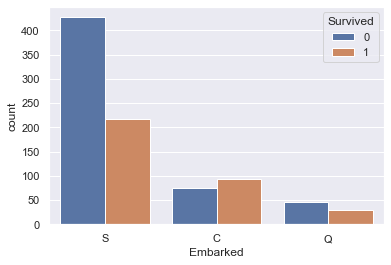

In [164]:
sns.countplot('Embarked', hue='Survived', data=train)

In [165]:
# pclass=(train.groupby('Pclass')['Survived'].mean()*10)/2.423625
# pclass

In [166]:
train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

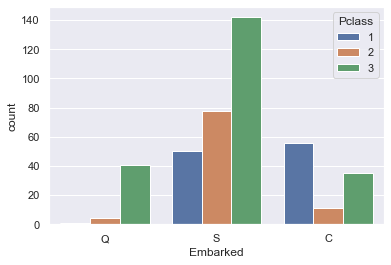

In [167]:
sns.countplot('Embarked', hue='Pclass', data=test);

In [168]:
# dataset['Pclass']=dataset['Pclass'].map(pclass) 

In [169]:
dataset=pd.concat((dataset,pd.get_dummies(dataset.Embarked, drop_first=True,columns={'Q':'Queenstown','S':'Southampton'})), axis=1)

In [170]:
dataset.groupby('Sex')["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [171]:
sex={'male':0,'female':1}
dataset['Sex']=dataset['Sex'].map(sex)

In [172]:
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Q,S
PassengerId,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2,0,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2,0,0
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2,0,1
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",0,42.0,0,0,A.5. 3236,8.0500,S,1,0,1
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,1,0,0
1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,0,1


In [173]:
dataset.drop(['Name', 'SibSp', 'Parch', 'Ticket','Embarked'], axis=1,inplace=True)

In [174]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Family_size,Q,S
PassengerId,,,,,,,,
1,0.0,3,0,22.0,7.2500,2,0,1
2,1.0,1,1,38.0,71.2833,2,0,0
3,1.0,3,1,26.0,7.9250,1,0,1
4,1.0,1,1,35.0,53.1000,2,0,1
5,0.0,3,0,35.0,8.0500,1,0,1


In [175]:
dataset.rename(columns={'Q':'Queenstown','S':'Southampton'},inplace=True)

In [176]:
dataset

,Survived,Pclass,Sex,Age,Fare,Family_size,Queenstown,Southampton
PassengerId,,,,,,,,
1,0.0,3,0,22.0,7.2500,2,0,1
2,1.0,1,1,38.0,71.2833,2,0,0
3,1.0,3,1,26.0,7.9250,1,0,1
4,1.0,1,1,35.0,53.1000,2,0,1
5,0.0,3,0,35.0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
1305,NaN,3,0,42.0,8.0500,1,0,1
1306,NaN,1,1,39.0,108.9000,1,0,0
1307,NaN,3,0,38.5,7.2500,1,0,1


In [177]:
x=dataset.drop('Survived', axis=1)
y=dataset['Survived'].values

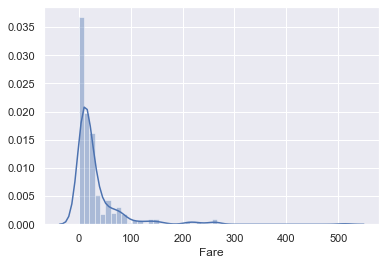

In [178]:
sns.distplot(x['Fare']);

In [179]:
x['Fare']=x['Fare'].map(lambda i:np.log(i) if i>0 else 0)

In [180]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)

In [113]:
train_x=x[:891,:]
test_x=x[891:1310,:]
train_y=y[:891]

# Model Building

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [115]:
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=10,shuffle=True, random_state=0)

In [116]:
clf=LogisticRegression(max_iter=1000)
score=cross_val_score(clf, train_x,train_y, cv=kfold)
score

array([0.83333333, 0.78651685, 0.78651685, 0.78651685, 0.76404494,
       0.79775281, 0.7752809 , 0.83146067, 0.79775281, 0.82022472])

In [117]:
score.mean()

0.7979400749063672

In [118]:
clf=KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(clf, train_x,train_y, cv=kfold)
score

array([0.8       , 0.82022472, 0.80898876, 0.83146067, 0.88764045,
       0.78651685, 0.78651685, 0.79775281, 0.82022472, 0.75280899])

In [119]:
score.mean()

0.8092134831460674

In [120]:
clf=SVC(random_state=0)
score=cross_val_score(clf, train_x,train_y, cv=kfold)
score

array([0.8       , 0.80898876, 0.80898876, 0.82022472, 0.85393258,
       0.80898876, 0.82022472, 0.80898876, 0.79775281, 0.79775281])

In [121]:
score.mean()

0.8125842696629213

In [122]:
clf=GaussianNB()
score=cross_val_score(clf, train_x,train_y, cv=kfold)
score

array([0.84444444, 0.79775281, 0.76404494, 0.69662921, 0.73033708,
       0.7752809 , 0.73033708, 0.82022472, 0.85393258, 0.79775281])

In [123]:
score.mean()

0.7810736579275905

In [124]:
clf=DecisionTreeClassifier(random_state=0)
score=cross_val_score(clf, train_x,train_y, cv=kfold)
score

array([0.77777778, 0.80898876, 0.7752809 , 0.70786517, 0.79775281,
       0.76404494, 0.76404494, 0.75280899, 0.76404494, 0.71910112])

In [125]:
score.mean()

0.7631710362047441

In [126]:
clf=RandomForestClassifier(n_estimators=12, random_state=0)
score=cross_val_score(clf, train_x,train_y, cv=kfold)
score

array([0.78888889, 0.86516854, 0.7752809 , 0.78651685, 0.80898876,
       0.79775281, 0.79775281, 0.76404494, 0.7752809 , 0.79775281])

In [127]:
score.mean()

0.7957428214731587

In [128]:
clf=SVC(random_state=0)
clf.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [129]:
y_pred=clf.predict(test_x).astype(int)

In [130]:
PassengerId=pd.read_csv('datasets/gender_submission.csv')['PassengerId']
pd.DataFrame({'Survived':y_pred}, index=PassengerId).to_csv('titanic_pred.csv')

### Dumping the model and preprocessing scale

In [131]:
import pickle
pickle_out=open('classifier.pkl','wb')
pickle.dump(clf,pickle_out)
pickle_out.close()

In [132]:
import pickle
pickle_out=open('scale.pkl','wb')
pickle.dump(sc,pickle_out)
pickle_out.close()